# PCA for 6 and 10 components

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [80]:
df_10_10inst = pd.read_csv('C:/PSL_KNN/data_10_frames_10_instances_removed.csv')

In [81]:
type(df_10_10inst)

pandas.core.frame.DataFrame

In [82]:
#videoname_to_drop

In [83]:
#df_10_10inst['videoname'].head()

In [84]:
#verify the type 
#type(df_10_10inst['videoname'][0])

In [85]:
#verify the type 
#type(videoname_to_drop[0])

In [86]:
'''
for i in range (0,225000):
    if (df_10_10inst['videoname'][i] in videoname_to_drop) :
        print (i)
        df_10_10inst.drop([i], axis=0, inplace=True)
'''

"\nfor i in range (0,225000):\n    if (df_10_10inst['videoname'][i] in videoname_to_drop) :\n        print (i)\n        df_10_10inst.drop([i], axis=0, inplace=True)\n"

In [87]:
'''
for i in range len(df_10_10inst):
    if (df_10_10inst['videoname'][i] in videoname_to_drop) :
        df_10_10inst.drop([i], axis=0, inplace=True)
'''

"\nfor i in range len(df_10_10inst):\n    if (df_10_10inst['videoname'][i] in videoname_to_drop) :\n        df_10_10inst.drop([i], axis=0, inplace=True)\n"

In [88]:
#df_10_10inst.drop([i], axis=0, inplace=True)

In [89]:
#df_10_10inst_NEW = df_10_10inst

In [90]:
#df_10_10inst.to_csv("data_10_frames_10_instances_removed.csv")

In [91]:
'''este no va
for i in range(23,33):
    df_10_10inst.drop(df_10_10inst[df_10_10inst.n_landmark == i].index, inplace=True)
df_10_10inst.head()
'''

'este no va\nfor i in range(23,33):\n    df_10_10inst.drop(df_10_10inst[df_10_10inst.n_landmark == i].index, inplace=True)\ndf_10_10inst.head()\n'

In [92]:
df_10_10inst['classes'] = df_10_10inst['videoname'].apply(lambda x: x.split('_')[0])
x_10_10inst = df_10_10inst.groupby('videoname').agg({'coordinate':lambda x: list(x)})
print(pd.unique(df_10_10inst['videoname']))

# WE ONLY HAVE 38 INSTANCES AND 10 CLASSES

['aprender_18' 'aprender_27' 'aprender_35' 'aprender_7' 'bien_174'
 'bien_269' 'comer_146' 'comer_164' 'comer_484' 'comer_489' 'comer_743'
 'comer_779' 'comer_86' 'cómo_12' 'cómo_387' 'cómo_90' 'decir_101'
 'decir_276' 'decir_528' 'decir_789' 'dentro_369' 'dentro_457'
 'dentro_692' 'dentro_73' 'ese_100' 'ese_385' 'ese_608' 'ese_638'
 'ese_642' 'ese_697' 'fuerte_153' 'pensar_339' 'pensar_66' 'pensar_761'
 'pensar_771' 'tú_277' 'tú_639' 'tú_778']


In [93]:
df_10_10inst.shape

(57000, 7)

In [94]:
df_10_10inst.coordinate

0        0.514383
1        0.548351
2        0.566327
3        0.582206
4        0.492199
           ...   
56995    1.000000
56996    1.000000
56997    1.000000
56998    1.000000
56999    1.000000
Name: coordinate, Length: 57000, dtype: float64

In [95]:
temp_10_10inst = pd.DataFrame(x_10_10inst['coordinate'].tolist())
temp_10_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,0.514383,0.548351,0.566327,0.582206,0.492199,0.473182,0.458070,0.605817,0.432215,0.548546,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.503314,0.525787,0.540517,0.552647,0.479308,0.461066,0.442991,0.578205,0.415670,0.533213,...,0.218056,0.229558,0.271873,0.260261,0.248606,0.257307,0.300118,0.284696,0.269780,0.271916
2,0.469856,0.492260,0.508573,0.525647,0.448011,0.437482,0.425903,0.561330,0.415927,0.513131,...,0.541281,0.547010,0.554929,0.565804,0.574465,0.582370,0.572662,0.582474,0.591038,0.599251
3,0.516629,0.533556,0.545480,0.558149,0.498532,0.482805,0.466799,0.570888,0.430847,0.537545,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.503843,0.535313,0.549920,0.566584,0.500478,0.490255,0.481394,0.610536,0.490198,0.532962,...,0.640371,0.635449,0.655707,0.660179,0.657015,0.651047,0.665254,0.672792,0.671988,0.666939


In [96]:
temp_10_10inst.insert(0,"instance",['aprender_18', 'aprender_27', 'aprender_35', 'aprender_7', 'bien_174',
 'bien_269', 'comer_146', 'comer_164', 'comer_484', 'comer_489', 'comer_743',
 'comer_779', 'comer_86', 'cómo_12', 'cómo_387', 'cómo_90', 'decir_101',
 'decir_276', 'decir_528', 'decir_789', 'dentro_369', 'dentro_457',
 'dentro_692', 'dentro_73', 'ese_100', 'ese_385', 'ese_608', 'ese_638',
 'ese_642', 'ese_697', 'fuerte_153', 'pensar_339', 'pensar_66', 'pensar_761',
 'pensar_771', 'tú_277', 'tú_639', 'tú_778'],True)


temp_10_10inst['classes'] = temp_10_10inst['instance'].apply(lambda x: x.split('_')[0])

temp_10_10inst.head()

,instance,0,1,2,3,4,5,6,7,8,...,1491,1492,1493,1494,1495,1496,1497,1498,1499,classes
0,aprender_18,0.514383,0.548351,0.566327,0.582206,0.492199,0.473182,0.458070,0.605817,0.432215,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,aprender
1,aprender_27,0.503314,0.525787,0.540517,0.552647,0.479308,0.461066,0.442991,0.578205,0.415670,...,0.229558,0.271873,0.260261,0.248606,0.257307,0.300118,0.284696,0.269780,0.271916,aprender
2,aprender_35,0.469856,0.492260,0.508573,0.525647,0.448011,0.437482,0.425903,0.561330,0.415927,...,0.547010,0.554929,0.565804,0.574465,0.582370,0.572662,0.582474,0.591038,0.599251,aprender
3,aprender_7,0.516629,0.533556,0.545480,0.558149,0.498532,0.482805,0.466799,0.570888,0.430847,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,aprender
4,bien_174,0.503843,0.535313,0.549920,0.566584,0.500478,0.490255,0.481394,0.610536,0.490198,...,0.635449,0.655707,0.660179,0.657015,0.651047,0.665254,0.672792,0.671988,0.666939,bien


In [97]:
 # Number of instances
temp_10_10inst['instance'].nunique()


38

In [98]:
# Number of classes
temp_10_10inst['classes'].nunique()

10

In [99]:
alldataset_dataset_10_10inst = temp_10_10inst.iloc[:,1:1502]  #1301 columns
new_alldataset_dataset_10_10inst = temp_10_10inst.iloc[:,1:1501]  #1300 columns
new_alldataset_dataset_10_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,0.514383,0.548351,0.566327,0.582206,0.492199,0.473182,0.458070,0.605817,0.432215,0.548546,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.503314,0.525787,0.540517,0.552647,0.479308,0.461066,0.442991,0.578205,0.415670,0.533213,...,0.218056,0.229558,0.271873,0.260261,0.248606,0.257307,0.300118,0.284696,0.269780,0.271916
2,0.469856,0.492260,0.508573,0.525647,0.448011,0.437482,0.425903,0.561330,0.415927,0.513131,...,0.541281,0.547010,0.554929,0.565804,0.574465,0.582370,0.572662,0.582474,0.591038,0.599251
3,0.516629,0.533556,0.545480,0.558149,0.498532,0.482805,0.466799,0.570888,0.430847,0.537545,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.503843,0.535313,0.549920,0.566584,0.500478,0.490255,0.481394,0.610536,0.490198,0.532962,...,0.640371,0.635449,0.655707,0.660179,0.657015,0.651047,0.665254,0.672792,0.671988,0.666939


In [100]:
alldataset_dataset_10_10inst = alldataset_dataset_10_10inst.T.iloc[:1500,:]
alldataset_dataset_10_10inst.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,0.514383,0.503314,0.469856,0.516629,0.503843,0.47662,0.463476,0.495108,0.487943,0.482682,...,0.453419,0.491052,0.498896,0.486937,0.470199,0.485829,0.493952,0.468635,0.464856,0.460416
1,0.548351,0.525787,0.49226,0.533556,0.535313,0.50778,0.506038,0.525966,0.516029,0.510423,...,0.477035,0.519342,0.514533,0.503088,0.493956,0.51085,0.52408,0.504873,0.485062,0.491802
2,0.566327,0.540517,0.508573,0.54548,0.54992,0.523758,0.525913,0.539569,0.534687,0.529385,...,0.494325,0.538095,0.528767,0.519589,0.512182,0.528406,0.543434,0.526495,0.501248,0.512896
3,0.582206,0.552647,0.525647,0.558149,0.566584,0.536716,0.545486,0.553492,0.550752,0.545311,...,0.510453,0.555561,0.539782,0.534885,0.530087,0.545949,0.562762,0.544167,0.516839,0.531868
4,0.492199,0.479308,0.448011,0.498532,0.500478,0.452354,0.458052,0.47003,0.459205,0.456108,...,0.427437,0.465349,0.465788,0.453108,0.439923,0.456175,0.467776,0.449056,0.433768,0.442668


In [101]:
alldataset_dataset_10_10inst.columns = ['aprender_18', 'aprender_27', 'aprender_35', 'aprender_7', 'bien_174',
 'bien_269', 'comer_146', 'comer_164', 'comer_484', 'comer_489', 'comer_743',
 'comer_779', 'comer_86', 'cómo_12', 'cómo_387', 'cómo_90', 'decir_101',
 'decir_276', 'decir_528', 'decir_789', 'dentro_369', 'dentro_457',
 'dentro_692', 'dentro_73', 'ese_100', 'ese_385', 'ese_608', 'ese_638',
 'ese_642', 'ese_697', 'fuerte_153', 'pensar_339', 'pensar_66', 'pensar_761',
 'pensar_771', 'tú_277', 'tú_639', 'tú_778']

In [102]:
alldataset_dataset_10_10inst_features = ['feature_0','feature_1','feature_2','feature_3','feature_4','feature_5','feature_6','feature_7','feature_8','feature_9','feature_10','feature_11','feature_12','feature_13','feature_14','feature_15','feature_16','feature_17','feature_18','feature_19','feature_20','feature_21','feature_22','feature_23','feature_24','feature_25','feature_26','feature_27','feature_28','feature_29','feature_30','feature_31','feature_32','feature_33','feature_34','feature_35','feature_36','feature_37','feature_38','feature_39','feature_40','feature_41','feature_42','feature_43','feature_44','feature_45','feature_46','feature_47','feature_48','feature_49','feature_50','feature_51','feature_52','feature_53','feature_54','feature_55','feature_56','feature_57','feature_58','feature_59','feature_60','feature_61','feature_62','feature_63','feature_64','feature_65','feature_66','feature_67','feature_68','feature_69','feature_70','feature_71','feature_72','feature_73','feature_74','feature_75','feature_76','feature_77','feature_78','feature_79','feature_80','feature_81','feature_82','feature_83','feature_84','feature_85','feature_86','feature_87','feature_88','feature_89','feature_90','feature_91','feature_92','feature_93','feature_94','feature_95','feature_96','feature_97','feature_98','feature_99','feature_100','feature_101','feature_102','feature_103','feature_104','feature_105','feature_106','feature_107','feature_108','feature_109','feature_110','feature_111','feature_112','feature_113','feature_114','feature_115','feature_116','feature_117','feature_118','feature_119','feature_120','feature_121','feature_122','feature_123','feature_124','feature_125','feature_126','feature_127','feature_128','feature_129','feature_130','feature_131','feature_132','feature_133','feature_134','feature_135','feature_136','feature_137','feature_138','feature_139','feature_140','feature_141','feature_142','feature_143','feature_144','feature_145','feature_146','feature_147','feature_148','feature_149','feature_150','feature_151','feature_152','feature_153','feature_154','feature_155','feature_156','feature_157','feature_158','feature_159','feature_160','feature_161','feature_162','feature_163','feature_164','feature_165','feature_166','feature_167','feature_168','feature_169','feature_170','feature_171','feature_172','feature_173','feature_174','feature_175','feature_176','feature_177','feature_178','feature_179','feature_180','feature_181','feature_182','feature_183','feature_184','feature_185','feature_186','feature_187','feature_188','feature_189','feature_190','feature_191','feature_192','feature_193','feature_194','feature_195','feature_196','feature_197','feature_198','feature_199','feature_200','feature_201','feature_202','feature_203','feature_204','feature_205','feature_206','feature_207','feature_208','feature_209','feature_210','feature_211','feature_212','feature_213','feature_214','feature_215','feature_216','feature_217','feature_218','feature_219','feature_220','feature_221','feature_222','feature_223','feature_224','feature_225','feature_226','feature_227','feature_228','feature_229','feature_230','feature_231','feature_232','feature_233','feature_234','feature_235','feature_236','feature_237','feature_238','feature_239','feature_240','feature_241','feature_242','feature_243','feature_244','feature_245','feature_246','feature_247','feature_248','feature_249','feature_250','feature_251','feature_252','feature_253','feature_254','feature_255','feature_256','feature_257','feature_258','feature_259','feature_260','feature_261','feature_262','feature_263','feature_264','feature_265','feature_266','feature_267','feature_268','feature_269','feature_270','feature_271','feature_272','feature_273','feature_274','feature_275','feature_276','feature_277','feature_278','feature_279','feature_280','feature_281','feature_282','feature_283','feature_284','feature_285','feature_286','feature_287','feature_288','feature_289','feature_290','feature_291','feature_292','feature_293','feature_294','feature_295','feature_296','feature_297','feature_298','feature_299','feature_300','feature_301','feature_302','feature_303','feature_304','feature_305','feature_306','feature_307','feature_308','feature_309','feature_310','feature_311','feature_312','feature_313','feature_314','feature_315','feature_316','feature_317','feature_318','feature_319','feature_320','feature_321','feature_322','feature_323','feature_324','feature_325','feature_326','feature_327','feature_328','feature_329','feature_330','feature_331','feature_332','feature_333','feature_334','feature_335','feature_336','feature_337','feature_338','feature_339','feature_340','feature_341','feature_342','feature_343','feature_344','feature_345','feature_346','feature_347','feature_348','feature_349','feature_350','feature_351','feature_352','feature_353','feature_354','feature_355','feature_356','feature_357','feature_358','feature_359','feature_360','feature_361','feature_362','feature_363','feature_364','feature_365','feature_366','feature_367','feature_368','feature_369','feature_370','feature_371','feature_372','feature_373','feature_374','feature_375','feature_376','feature_377','feature_378','feature_379','feature_380','feature_381','feature_382','feature_383','feature_384','feature_385','feature_386','feature_387','feature_388','feature_389','feature_390','feature_391','feature_392','feature_393','feature_394','feature_395','feature_396','feature_397','feature_398','feature_399','feature_400','feature_401','feature_402','feature_403','feature_404','feature_405','feature_406','feature_407','feature_408','feature_409','feature_410','feature_411','feature_412','feature_413','feature_414','feature_415','feature_416','feature_417','feature_418','feature_419','feature_420','feature_421','feature_422','feature_423','feature_424','feature_425','feature_426','feature_427','feature_428','feature_429','feature_430','feature_431','feature_432','feature_433','feature_434','feature_435','feature_436','feature_437','feature_438','feature_439','feature_440','feature_441','feature_442','feature_443','feature_444','feature_445','feature_446','feature_447','feature_448','feature_449','feature_450','feature_451','feature_452','feature_453','feature_454','feature_455','feature_456','feature_457','feature_458', 'feature_459', 'feature_460','feature_461','feature_462','feature_463','feature_464','feature_465','feature_466','feature_467','feature_468','feature_469','feature_470','feature_471','feature_472','feature_473','feature_474','feature_475','feature_476','feature_477','feature_478','feature_479','feature_480','feature_481','feature_482','feature_483','feature_484','feature_485','feature_486','feature_487','feature_488','feature_489','feature_490','feature_491','feature_492','feature_493','feature_494','feature_495','feature_496','feature_497','feature_498','feature_499','feature_500','feature_501','feature_502','feature_503','feature_504','feature_505','feature_506','feature_507','feature_508','feature_509','feature_510','feature_511','feature_512','feature_513','feature_514','feature_515','feature_516','feature_517','feature_518','feature_519','feature_520','feature_521','feature_522','feature_523','feature_524','feature_525','feature_526','feature_527','feature_528','feature_529','feature_530','feature_531','feature_532','feature_533','feature_534','feature_535','feature_536','feature_537','feature_538','feature_539','feature_540','feature_541','feature_542','feature_543','feature_544','feature_545','feature_546','feature_547','feature_548','feature_549','feature_550','feature_551','feature_552','feature_553','feature_554','feature_555','feature_556','feature_557','feature_558','feature_559','feature_560','feature_561','feature_562','feature_563','feature_564','feature_565','feature_566','feature_567','feature_568','feature_569','feature_570','feature_571','feature_572','feature_573','feature_574','feature_575','feature_576','feature_577','feature_578','feature_579','feature_580','feature_581','feature_582','feature_583','feature_584','feature_585','feature_586','feature_587','feature_588','feature_589','feature_590','feature_591','feature_592','feature_593','feature_594','feature_595','feature_596','feature_597','feature_598','feature_599','feature_600','feature_601','feature_602','feature_603','feature_604','feature_605','feature_606','feature_607','feature_608','feature_609','feature_610','feature_611','feature_612','feature_613','feature_614','feature_615','feature_616','feature_617','feature_618','feature_619','feature_620','feature_621','feature_622','feature_623','feature_624','feature_625','feature_626','feature_627','feature_628','feature_629','feature_630','feature_631','feature_632','feature_633','feature_634','feature_635','feature_636','feature_637','feature_638','feature_639','feature_640','feature_641','feature_642','feature_643','feature_644','feature_645','feature_646','feature_647','feature_648','feature_649','feature_650','feature_651','feature_652','feature_653','feature_654','feature_655','feature_656','feature_657','feature_658','feature_659','feature_660','feature_661','feature_662','feature_663','feature_664','feature_665','feature_666','feature_667','feature_668','feature_669','feature_670','feature_671','feature_672','feature_673','feature_674','feature_675','feature_676','feature_677','feature_678','feature_679','feature_680','feature_681','feature_682','feature_683','feature_684','feature_685','feature_686','feature_687','feature_688','feature_689','feature_690','feature_691','feature_692','feature_693','feature_694','feature_695','feature_696','feature_697','feature_698','feature_699','feature_700','feature_701','feature_702','feature_703','feature_704','feature_705','feature_706','feature_707','feature_708','feature_709','feature_710','feature_711','feature_712','feature_713','feature_714','feature_715','feature_716','feature_717','feature_718',
'feature_719','feature_720','feature_721','feature_722','feature_723','feature_724','feature_725','feature_726','feature_727','feature_728','feature_729','feature_730','feature_731','feature_732','feature_733','feature_734','feature_735','feature_736','feature_737','feature_738','feature_739','feature_740','feature_741','feature_742','feature_743','feature_744','feature_745','feature_746','feature_747','feature_748','feature_749','feature_750','feature_751','feature_752','feature_753','feature_754','feature_755','feature_756','feature_757','feature_758','feature_759','feature_760','feature_761','feature_762','feature_763','feature_764','feature_765','feature_766','feature_767','feature_768','feature_769','feature_770','feature_771','feature_772','feature_773','feature_774','feature_775','feature_776','feature_777','feature_778','feature_779','feature_780','feature_781','feature_782','feature_783','feature_784','feature_785','feature_786','feature_787','feature_788','feature_789','feature_790','feature_791','feature_792','feature_793','feature_794','feature_795','feature_796','feature_797','feature_798','feature_799','feature_800','feature_801','feature_802','feature_803','feature_804','feature_805','feature_806','feature_807','feature_808','feature_809','feature_810','feature_811','feature_812','feature_813','feature_814','feature_815','feature_816','feature_817','feature_818','feature_819','feature_820','feature_821','feature_822','feature_823','feature_824','feature_825','feature_826','feature_827','feature_828','feature_829','feature_830','feature_831','feature_832','feature_833','feature_834','feature_835','feature_836','feature_837','feature_838','feature_839','feature_840','feature_841','feature_842','feature_843','feature_844','feature_845','feature_846','feature_847','feature_848','feature_849','feature_850','feature_851','feature_852','feature_853','feature_854','feature_855','feature_856','feature_857','feature_858','feature_859','feature_860','feature_861','feature_862','feature_863','feature_864','feature_865','feature_866','feature_867','feature_868','feature_869','feature_870','feature_871','feature_872','feature_873','feature_874','feature_875','feature_876','feature_877','feature_878','feature_879','feature_880','feature_881','feature_882','feature_883','feature_884','feature_885','feature_886','feature_887','feature_888','feature_889','feature_890','feature_891','feature_892','feature_893','feature_894','feature_895','feature_896','feature_897','feature_898','feature_899','feature_900','feature_901','feature_902','feature_903','feature_904','feature_905','feature_906','feature_907','feature_908','feature_909','feature_910','feature_911','feature_912','feature_913','feature_914','feature_915','feature_916','feature_917','feature_918','feature_919','feature_920','feature_921','feature_922','feature_923','feature_924','feature_925','feature_926','feature_927','feature_928','feature_929','feature_930','feature_931','feature_932','feature_933','feature_934','feature_935','feature_936','feature_937','feature_938','feature_939','feature_940','feature_941','feature_942','feature_943','feature_944','feature_945','feature_946','feature_947','feature_948','feature_949','feature_950','feature_951','feature_952','feature_953','feature_954','feature_955','feature_956','feature_957','feature_958','feature_959','feature_960','feature_961','feature_962','feature_963','feature_964','feature_965','feature_966','feature_967','feature_968','feature_969','feature_970','feature_971','feature_972','feature_973','feature_974','feature_975','feature_976','feature_977','feature_978','feature_979','feature_980','feature_981','feature_982','feature_983','feature_984','feature_985','feature_986','feature_987','feature_988','feature_989','feature_990','feature_991','feature_992','feature_993','feature_994','feature_995','feature_996','feature_997','feature_998','feature_999','feature_1000','feature_1001','feature_1002','feature_1003','feature_1004','feature_1005','feature_1006','feature_1007','feature_1008','feature_1009','feature_1010','feature_1011','feature_1012','feature_1013','feature_1014','feature_1015','feature_1016','feature_1017','feature_1018','feature_1019','feature_1020','feature_1021','feature_1022','feature_1023','feature_1024','feature_1025','feature_1026','feature_1027','feature_1028','feature_1029','feature_1030','feature_1031','feature_1032','feature_1033','feature_1034','feature_1035','feature_1036','feature_1037','feature_1038','feature_1039','feature_1040','feature_1041','feature_1042','feature_1043','feature_1044','feature_1045','feature_1046','feature_1047','feature_1048','feature_1049','feature_1050','feature_1051','feature_1052','feature_1053','feature_1054','feature_1055','feature_1056','feature_1057','feature_1058','feature_1059','feature_1060','feature_1061','feature_1062','feature_1063','feature_1064','feature_1065','feature_1066','feature_1067','feature_1068','feature_1069','feature_1070','feature_1071','feature_1072','feature_1073','feature_1074','feature_1075','feature_1076','feature_1077','feature_1078','feature_1079','feature_1080','feature_1081','feature_1082','feature_1083','feature_1084','feature_1085','feature_1086','feature_1087','feature_1088','feature_1089','feature_1090','feature_1091','feature_1092','feature_1093','feature_1094','feature_1095','feature_1096','feature_1097','feature_1098','feature_1099','feature_1100','feature_1101','feature_1102','feature_1103','feature_1104','feature_1105','feature_1106','feature_1107','feature_1108','feature_1109','feature_1110','feature_1111','feature_1112','feature_1113','feature_1114','feature_1115','feature_1116','feature_1117','feature_1118','feature_1119','feature_1120','feature_1121','feature_1122','feature_1123','feature_1124','feature_1125','feature_1126','feature_1127','feature_1128','feature_1129','feature_1130','feature_1131','feature_1132','feature_1133','feature_1134','feature_1135','feature_1136','feature_1137','feature_1138','feature_1139','feature_1140','feature_1141','feature_1142','feature_1143','feature_1144','feature_1145','feature_1146','feature_1147','feature_1148','feature_1149','feature_1150','feature_1151','feature_1152','feature_1153','feature_1154','feature_1155','feature_1156','feature_1157','feature_1158','feature_1159','feature_1160','feature_1161','feature_1162','feature_1163','feature_1164','feature_1165','feature_1166','feature_1167','feature_1168','feature_1169','feature_1170','feature_1171','feature_1172','feature_1173','feature_1174','feature_1175','feature_1176','feature_1177','feature_1178','feature_1179','feature_1180','feature_1181','feature_1182','feature_1183','feature_1184','feature_1185','feature_1186','feature_1187','feature_1188','feature_1189','feature_1190','feature_1191','feature_1192','feature_1193','feature_1194','feature_1195','feature_1196','feature_1197','feature_1198','feature_1199','feature_1200','feature_1201','feature_1202','feature_1203','feature_1204','feature_1205','feature_1206','feature_1207','feature_1208','feature_1209','feature_1210','feature_1211','feature_1212','feature_1213','feature_1214','feature_1215','feature_1216','feature_1217','feature_1218','feature_1219','feature_1220','feature_1221','feature_1222','feature_1223','feature_1224','feature_1225','feature_1226','feature_1227','feature_1228','feature_1229','feature_1230','feature_1231','feature_1232','feature_1233','feature_1234','feature_1235','feature_1236','feature_1237','feature_1238','feature_1239','feature_1240','feature_1241','feature_1242','feature_1243','feature_1244','feature_1245','feature_1246','feature_1247','feature_1248','feature_1249','feature_1250','feature_1251','feature_1252','feature_1253','feature_1254','feature_1255','feature_1256','feature_1257','feature_1258','feature_1259','feature_1260','feature_1261','feature_1262','feature_1263','feature_1264','feature_1265','feature_1266','feature_1267','feature_1268','feature_1269','feature_1270','feature_1271','feature_1272','feature_1273','feature_1274','feature_1275','feature_1276','feature_1277','feature_1278','feature_1279','feature_1280','feature_1281','feature_1282','feature_1283','feature_1284','feature_1285','feature_1286','feature_1287','feature_1288','feature_1289','feature_1290','feature_1291','feature_1292','feature_1293','feature_1294','feature_1295','feature_1296','feature_1297','feature_1298','feature_1299', 'feature_1300','feature_1301','feature_1302','feature_1303','feature_1304','feature_1305','feature_1306','feature_1307','feature_1308','feature_1309','feature_1310','feature_1311','feature_1312','feature_1313','feature_1314','feature_1315','feature_1316','feature_1317','feature_1318','feature_1319','feature_1320','feature_1321','feature_1322','feature_1323','feature_1324','feature_1325','feature_1326','feature_1327','feature_1328','feature_1329','feature_1330','feature_1331','feature_1332','feature_1333','feature_1334','feature_1335','feature_1336','feature_1337','feature_1338','feature_1339','feature_1340','feature_1341','feature_1342','feature_1343','feature_1344','feature_1345','feature_1346','feature_1347','feature_1348','feature_1349','feature_1350','feature_1351','feature_1352','feature_1353','feature_1354','feature_1355','feature_1356','feature_1357','feature_1358','feature_1359','feature_1360','feature_1361','feature_1362','feature_1363','feature_1364','feature_1365','feature_1366','feature_1367','feature_1368','feature_1369','feature_1370','feature_1371','feature_1372','feature_1373','feature_1374','feature_1375','feature_1376','feature_1377','feature_1378','feature_1379','feature_1380','feature_1381','feature_1382','feature_1383','feature_1384','feature_1385','feature_1386','feature_1387','feature_1388','feature_1389','feature_1390','feature_1391','feature_1392','feature_1393','feature_1394','feature_1395','feature_1396','feature_1397','feature_1398','feature_1399','feature_1400','feature_1401','feature_1402','feature_1403',
'feature_1404','feature_1405','feature_1406','feature_1407','feature_1408','feature_1409','feature_1410','feature_1411','feature_1412','feature_1413','feature_1414','feature_1415','feature_1416','feature_1417','feature_1418','feature_1419','feature_1420','feature_1421','feature_1422','feature_1423','feature_1424','feature_1425','feature_1426','feature_1427','feature_1428','feature_1429','feature_1430','feature_1431','feature_1432','feature_1433','feature_1434','feature_1435','feature_1436','feature_1437','feature_1438','feature_1439','feature_1440','feature_1441','feature_1442','feature_1443','feature_1444','feature_1445','feature_1446','feature_1447','feature_1448','feature_1449','feature_1450','feature_1451','feature_1452','feature_1453','feature_1454','feature_1455','feature_1456','feature_1457','feature_1458','feature_1459','feature_1460','feature_1461','feature_1462','feature_1463','feature_1464','feature_1465','feature_1466','feature_1467','feature_1468','feature_1469','feature_1470','feature_1471','feature_1472','feature_1473','feature_1474','feature_1475','feature_1476','feature_1477','feature_1478','feature_1479','feature_1480','feature_1481','feature_1482','feature_1483','feature_1484','feature_1485','feature_1486','feature_1487','feature_1488','feature_1489','feature_1490','feature_1491','feature_1492','feature_1493','feature_1494','feature_1495','feature_1496','feature_1497','feature_1498','feature_1499']

In [103]:
alldataset_dataset_10_10inst.head()

,aprender_18,aprender_27,aprender_35,aprender_7,bien_174,bien_269,comer_146,comer_164,comer_484,comer_489,...,ese_642,ese_697,fuerte_153,pensar_339,pensar_66,pensar_761,pensar_771,tú_277,tú_639,tú_778
0,0.514383,0.503314,0.469856,0.516629,0.503843,0.47662,0.463476,0.495108,0.487943,0.482682,...,0.453419,0.491052,0.498896,0.486937,0.470199,0.485829,0.493952,0.468635,0.464856,0.460416
1,0.548351,0.525787,0.49226,0.533556,0.535313,0.50778,0.506038,0.525966,0.516029,0.510423,...,0.477035,0.519342,0.514533,0.503088,0.493956,0.51085,0.52408,0.504873,0.485062,0.491802
2,0.566327,0.540517,0.508573,0.54548,0.54992,0.523758,0.525913,0.539569,0.534687,0.529385,...,0.494325,0.538095,0.528767,0.519589,0.512182,0.528406,0.543434,0.526495,0.501248,0.512896
3,0.582206,0.552647,0.525647,0.558149,0.566584,0.536716,0.545486,0.553492,0.550752,0.545311,...,0.510453,0.555561,0.539782,0.534885,0.530087,0.545949,0.562762,0.544167,0.516839,0.531868
4,0.492199,0.479308,0.448011,0.498532,0.500478,0.452354,0.458052,0.47003,0.459205,0.456108,...,0.427437,0.465349,0.465788,0.453108,0.439923,0.456175,0.467776,0.449056,0.433768,0.442668


In [104]:
alldataset_dataset_10_10inst['features'] = alldataset_dataset_10_10inst_features

alldataset_dataset_10_10inst.set_index('features',inplace = True)

In [105]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

# sklearn center and scale the data, so that the means for each gene (instance) are 0 and the standard deviations for each gene are 1
scaled_data_alldataset = preprocessing.scale(alldataset_dataset_10_10inst.T)

In [106]:
pca_alldataset = PCA()
pca_alldataset.fit(scaled_data_alldataset)
pca_data_alldataset = pca_alldataset.transform(scaled_data_alldataset)

In [107]:
per_var_alldataset = np.round(pca_alldataset.explained_variance_ratio_* 100 , decimals = 1)
labels_alldataset = ['PC' + str(x) for x in range(1 , len(per_var_alldataset) +1)]

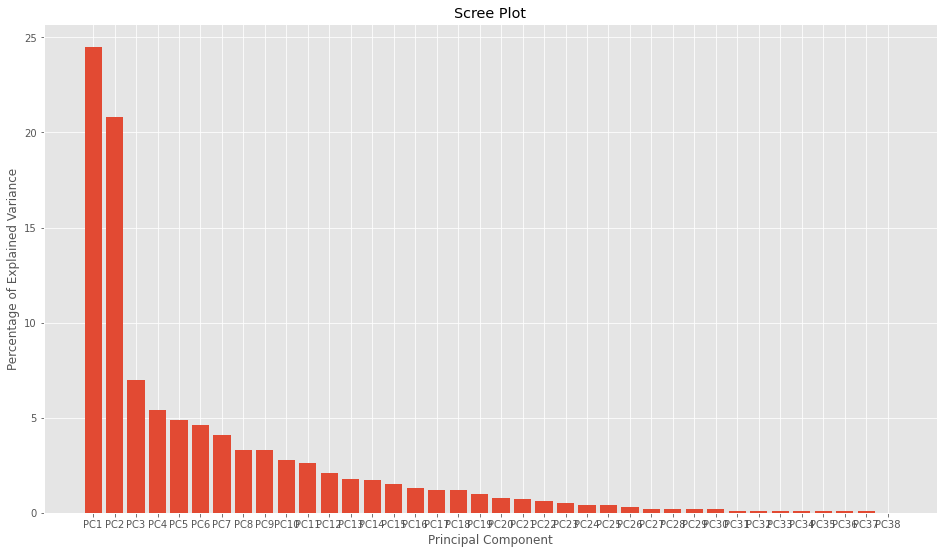

In [108]:
plt.bar(x=range(1, len(per_var_alldataset) + 1 ), height = per_var_alldataset, tick_label = labels_alldataset)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [109]:
#Ojo, se cambió de posición (transposición), por eso pareciera que ambos (index y columns) llevaran lo mismo pero NO. El index lleva las instancias.
pca_df_alldataset_alldataset = pd.DataFrame(pca_data_alldataset, index = alldataset_dataset_10_10inst.columns , columns = labels_alldataset)

In [110]:
# Loading scores for PC1

loading_scores_alldataset  = pd.Series(pca_alldataset.components_[0], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC1_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC1_df_alldataset = PC1_loading_scores_alldataset.to_frame()
PC1_df_alldataset = PC1_df_alldataset.rename(columns={0: 'Col_1'})
PC1_df_alldataset.reset_index(level=0, inplace=True)


# Loading scores for PC2


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[1], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values


PC2_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC2_df_alldataset = PC2_loading_scores_alldataset.to_frame()
PC2_df_alldataset = PC2_df_alldataset.rename(columns={0: 'Col_1'})
PC2_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC3


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[2], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values
PC3_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC3_df_alldataset = PC3_loading_scores_alldataset.to_frame()
PC3_df_alldataset = PC3_df_alldataset.rename(columns={0: 'Col_1'})
PC3_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC4


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[3], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC4_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC4_df_alldataset = PC4_loading_scores_alldataset.to_frame()
PC4_df_alldataset = PC4_df_alldataset.rename(columns={0: 'Col_1'})
PC4_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC5


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[4], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)
top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC5_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC5_df_alldataset = PC5_loading_scores_alldataset.to_frame()
PC5_df_alldataset = PC5_df_alldataset.rename(columns={0: 'Col_1'})
PC5_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC6


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[5], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC6_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC6_df_alldataset = PC6_loading_scores_alldataset.to_frame()
PC6_df_alldataset = PC6_df_alldataset.rename(columns={0: 'Col_1'})
PC6_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC7


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[6], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC7_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC7_df_alldataset = PC7_loading_scores_alldataset.to_frame()
PC7_df_alldataset = PC7_df_alldataset.rename(columns={0: 'Col_1'})
PC7_df_alldataset.reset_index(level=0, inplace=True)


# Loading scores for PC8


loading_scores_alldataset  = pd.Series(pca_alldataset.components_[7], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC8_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC8_df_alldataset = PC8_loading_scores_alldataset.to_frame()
PC8_df_alldataset = PC8_df_alldataset.rename(columns={0: 'Col_1'})
PC8_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC9

loading_scores_alldataset  = pd.Series(pca_alldataset.components_[8], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC9_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC9_df_alldataset = PC9_loading_scores_alldataset.to_frame()
PC9_df_alldataset = PC9_df_alldataset.rename(columns={0: 'Col_1'})

PC9_df_alldataset.reset_index(level=0, inplace=True)

# Loading scores for PC10

loading_scores_alldataset  = pd.Series(pca_alldataset.components_[9], index = alldataset_dataset_10_10inst_features)
sorted_loading_scores_alldataset = loading_scores_alldataset.abs().sort_values(ascending = False)

top_10_instances_alldataset = sorted_loading_scores_alldataset[0:10].index.values

PC10_loading_scores_alldataset = loading_scores_alldataset[top_10_instances_alldataset]

PC10_df_alldataset = PC10_loading_scores_alldataset.to_frame()
PC10_df_alldataset = PC10_df_alldataset.rename(columns={0: 'Col_1'})
PC10_df_alldataset.reset_index(level=0, inplace=True)



In [111]:
###########

#calcular qué feature se repite más

PCA_10components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset).append(PC7_df_alldataset).append(PC8_df_alldataset).append(PC9_df_alldataset).append(PC10_df_alldataset)

dic = {}
for i in range(100):
    x = list(PCA_10components_alldataset.iloc[i,:])
    if x[0] not in dic:
        dic[x[0]] = 1
    else:
        dic[x[0]] +=1

dic

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_18100\241421543.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_10components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset).append(PC7_df_alldataset).append(PC8_df_alldataset).append(PC9_df_alldataset).append(PC10_df_alldataset)
C:\Users\BRENDA\AppData\Local\Temp\ipykernel_18100\241421543.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_10components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset).append(PC7_df_alldataset).append(PC8_df_alldataset).append(PC9_df_alldataset).append(PC10_df_alldataset)
C:\Users\BRENDA\AppData\Local\

{'feature_1087': 1,
 'feature_1086': 1,
 'feature_1085': 1,
 'feature_1084': 1,
 'feature_1083': 1,
 'feature_1088': 1,
 'feature_996': 1,
 'feature_994': 1,
 'feature_992': 1,
 'feature_1071': 1,
 'feature_1208': 1,
 'feature_1133': 1,
 'feature_1283': 1,
 'feature_1358': 1,
 'feature_1433': 1,
 'feature_1058': 1,
 'feature_1210': 1,
 'feature_1135': 1,
 'feature_1285': 1,
 'feature_762': 1,
 'feature_382': 1,
 'feature_307': 1,
 'feature_532': 1,
 'feature_457': 1,
 'feature_232': 1,
 'feature_607': 1,
 'feature_157': 1,
 'feature_528': 1,
 'feature_453': 1,
 'feature_82': 1,
 'feature_58': 1,
 'feature_57': 1,
 'feature_66': 1,
 'feature_61': 1,
 'feature_62': 1,
 'feature_65': 1,
 'feature_60': 1,
 'feature_56': 1,
 'feature_402': 1,
 'feature_64': 1,
 'feature_146': 1,
 'feature_147': 1,
 'feature_142': 1,
 'feature_143': 1,
 'feature_129': 1,
 'feature_138': 1,
 'feature_148': 1,
 'feature_139': 1,
 'feature_144': 1,
 'feature_134': 1,
 'feature_212': 1,
 'feature_211': 1,
 'feat

In [112]:
##############################
  #HOW TO CALCULATE WITH PCA ( 10 components )
#############################

		
projection_alldataset = pca_alldataset.transform(X=new_alldataset_dataset_10_10inst)
projection_alldataset = pd.DataFrame(
    projection_alldataset,
    columns =[ 'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38'

    ],
    index   = new_alldataset_dataset_10_10inst.index
)
projection_alldataset.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38
0,17.529221,-9.864477,-6.884078,0.999381,-5.104867,-11.008242,3.969023,1.636268,-2.480500,-5.363970,...,-3.082140,1.339120,-0.370908,0.111421,-1.542304,-0.005584,-0.408887,3.655334,2.090745,0.262126
1,15.123329,-11.834613,-8.654339,2.202311,-5.998027,-11.347111,7.116702,-2.184100,-0.648869,-2.614577,...,-3.356048,1.318758,-1.268593,0.141528,-2.311697,-0.651788,-0.837568,2.903410,1.996800,0.334477
2,16.790802,-5.614461,-7.503312,0.863092,-4.983020,-6.727566,3.615663,-0.750882,0.018734,-5.471905,...,-3.348173,0.969695,-0.623574,0.932120,-2.435081,0.082932,-0.156312,3.339592,1.526862,0.403232
3,12.922393,-4.729330,-9.444706,3.768033,-3.983838,-8.576965,3.539862,-0.287855,0.160952,-3.777574,...,-3.355789,1.690790,-0.464710,0.687744,-2.059922,0.780818,-1.166334,3.885354,1.926880,0.343371
4,12.920476,-7.816932,-9.961831,3.819026,-3.787219,-8.622158,6.824744,-0.496637,-1.733397,-3.124404,...,-3.444435,1.555690,-0.710737,0.628606,-2.467695,0.281058,-1.105542,2.996725,2.154132,0.303217


In [113]:
#Just take the 10 first components
PC10_10_10inst_alldataset = projection_alldataset.iloc[:,0:10]
PC10_10_10inst_alldataset.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,17.529221,-9.864477,-6.884078,0.999381,-5.104867,-11.008242,3.969023,1.636268,-2.480500,-5.363970
1,15.123329,-11.834613,-8.654339,2.202311,-5.998027,-11.347111,7.116702,-2.184100,-0.648869,-2.614577
2,16.790802,-5.614461,-7.503312,0.863092,-4.983020,-6.727566,3.615663,-0.750882,0.018734,-5.471905
3,12.922393,-4.729330,-9.444706,3.768033,-3.983838,-8.576965,3.539862,-0.287855,0.160952,-3.777574
4,12.920476,-7.816932,-9.961831,3.819026,-3.787219,-8.622158,6.824744,-0.496637,-1.733397,-3.124404


In [114]:

PC10_10_10inst_alldataset.insert(0,"instance",['aprender_18', 'aprender_27', 'aprender_35', 'aprender_7', 'bien_174',
 'bien_269', 'comer_146', 'comer_164', 'comer_484', 'comer_489', 'comer_743',
 'comer_779', 'comer_86', 'cómo_12', 'cómo_387', 'cómo_90', 'decir_101',
 'decir_276', 'decir_528', 'decir_789', 'dentro_369', 'dentro_457',
 'dentro_692', 'dentro_73', 'ese_100', 'ese_385', 'ese_608', 'ese_638',
 'ese_642', 'ese_697', 'fuerte_153', 'pensar_339', 'pensar_66', 'pensar_761',
 'pensar_771', 'tú_277', 'tú_639', 'tú_778'],True)

In [115]:
PC10_10_10inst_alldataset['classes'] = PC10_10_10inst_alldataset['instance'].apply(lambda x: x.split('_')[0])

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_18100\2242510311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC10_10_10inst_alldataset['classes'] = PC10_10_10inst_alldataset['instance'].apply(lambda x: x.split('_')[0])


In [116]:
PC10_10_10inst_alldataset.drop("instance", axis=1, inplace=True)

PC10_10_10inst_alldataset.head()

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_18100\3033980328.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC10_10_10inst_alldataset.drop("instance", axis=1, inplace=True)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,classes
0,17.529221,-9.864477,-6.884078,0.999381,-5.104867,-11.008242,3.969023,1.636268,-2.480500,-5.363970,aprender
1,15.123329,-11.834613,-8.654339,2.202311,-5.998027,-11.347111,7.116702,-2.184100,-0.648869,-2.614577,aprender
2,16.790802,-5.614461,-7.503312,0.863092,-4.983020,-6.727566,3.615663,-0.750882,0.018734,-5.471905,aprender
3,12.922393,-4.729330,-9.444706,3.768033,-3.983838,-8.576965,3.539862,-0.287855,0.160952,-3.777574,aprender
4,12.920476,-7.816932,-9.961831,3.819026,-3.787219,-8.622158,6.824744,-0.496637,-1.733397,-3.124404,bien


In [117]:
print(pd.unique(PC10_10_10inst_alldataset['classes']))

X_PC10_10_10inst_alldataset= PC10_10_10inst_alldataset.iloc[:,:-1].values
y_PC10_10_10inst_alldataset=  PC10_10_10inst_alldataset.iloc[:,-1].values

['aprender' 'bien' 'comer' 'cómo' 'decir' 'dentro' 'ese' 'fuerte' 'pensar'
 'tú']


In [118]:
Labelencoder_Y = LabelEncoder()
y_PC10_10_10inst_alldataset== Labelencoder_Y.fit_transform(y_PC10_10_10inst_alldataset)
y_PC10_10_10inst_alldataset

array(['aprender', 'aprender', 'aprender', 'aprender', 'bien', 'bien',
       'comer', 'comer', 'comer', 'comer', 'comer', 'comer', 'comer',
       'cómo', 'cómo', 'cómo', 'decir', 'decir', 'decir', 'decir',
       'dentro', 'dentro', 'dentro', 'dentro', 'ese', 'ese', 'ese', 'ese',
       'ese', 'ese', 'fuerte', 'pensar', 'pensar', 'pensar', 'pensar',
       'tú', 'tú', 'tú'], dtype=object)

In [119]:
X_train_PC10_10_10inst_alldataset, X_test_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset = train_test_split(X_PC10_10_10inst_alldataset, y_PC10_10_10inst_alldataset, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_PC10_10_10inst_alldataset = scaler.fit_transform(X_train_PC10_10_10inst_alldataset)
X_test_PC10_10_10inst_alldataset = scaler.transform(X_test_PC10_10_10inst_alldataset)

([<matplotlib.axis.XTick at 0x1d93f756080>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

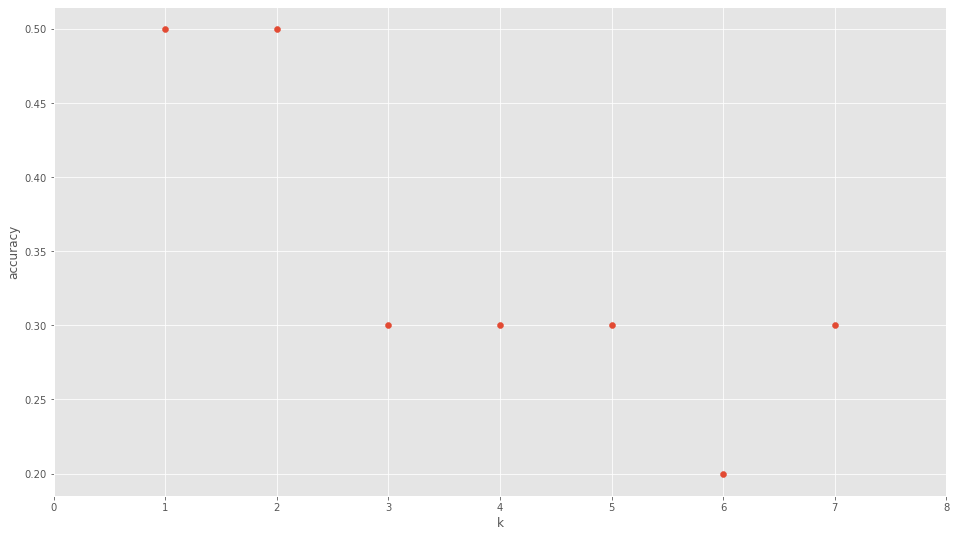

In [120]:
k_range_PC10_10_10inst_alldataset = range(1, 8)
scores_PC10_10_10inst_alldataset = []
for k in k_range_PC10_10_10inst_alldataset:
    knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors = k)
    knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
    scores_PC10_10_10inst_alldataset.append(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_PC10_10_10inst_alldataset, scores_PC10_10_10inst_alldataset)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.50


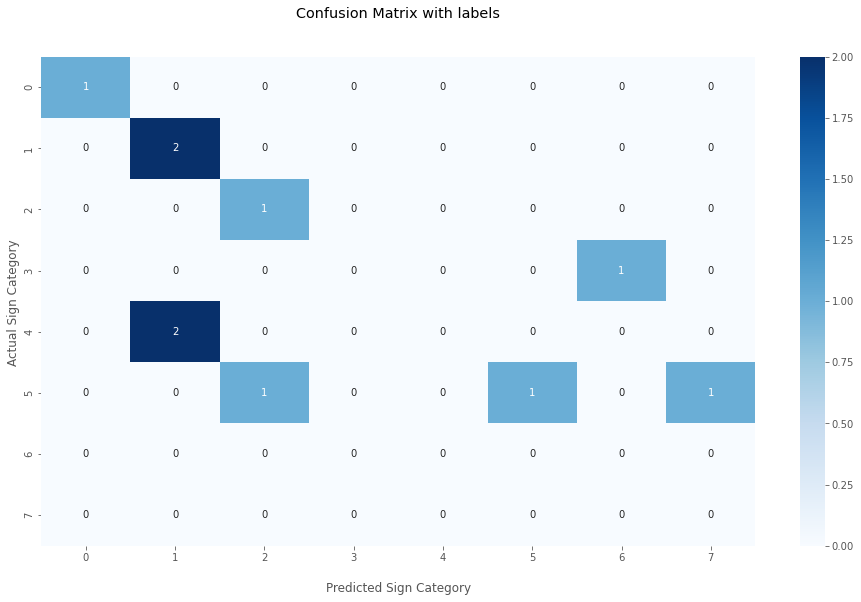

In [121]:
n_neighbors_PC10_10_10inst_alldataset = 1
 
knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_10_10inst_alldataset)
knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset)))

pred_PC10_10_10inst_alldataset = knn_PC10_10_10inst_alldataset.predict(X_test_PC10_10_10inst_alldataset)
cf_matrix_PC10_10_10inst_alldataset = confusion_matrix(y_test_PC10_10_10inst_alldataset, pred_PC10_10_10inst_alldataset)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_alldataset = sns.heatmap(cf_matrix_PC10_10_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.46
Accuracy of K-NN classifier on test set: 0.50


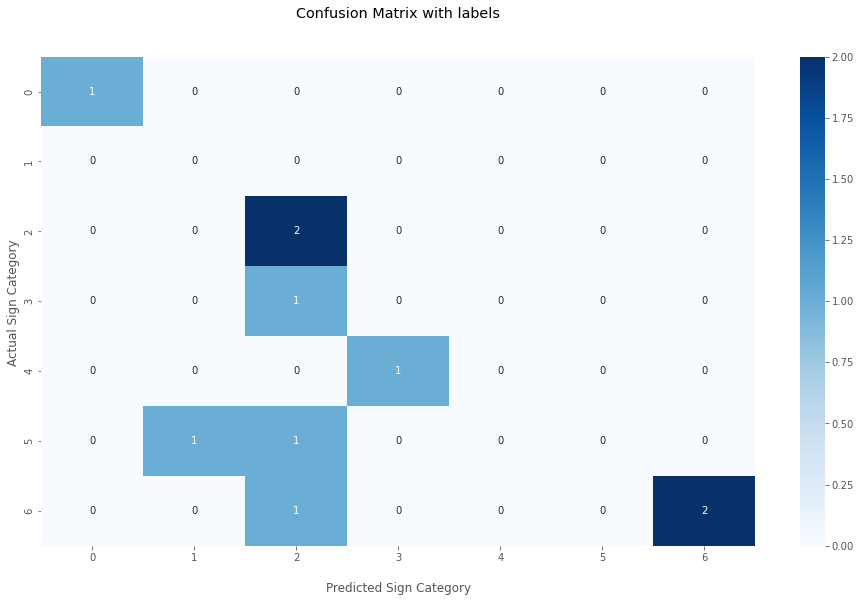

In [122]:
n_neighbors_PC10_10_10inst_alldataset = 2
 
knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_10_10inst_alldataset)
knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset)))

pred_PC10_10_10inst_alldataset = knn_PC10_10_10inst_alldataset.predict(X_test_PC10_10_10inst_alldataset)
cf_matrix_PC10_10_10inst_alldataset = confusion_matrix(y_test_PC10_10_10inst_alldataset, pred_PC10_10_10inst_alldataset)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_alldataset = sns.heatmap(cf_matrix_PC10_10_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.39
Accuracy of K-NN classifier on test set: 0.30


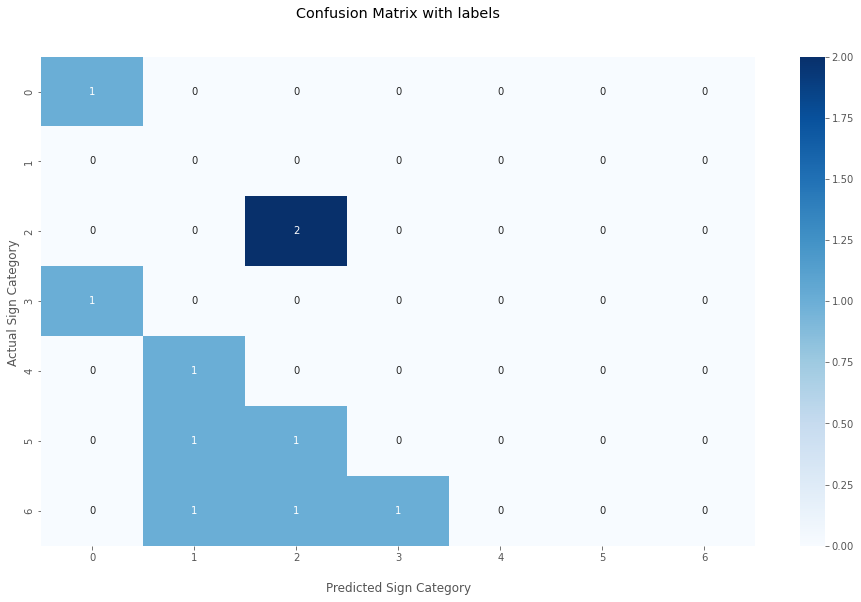

In [123]:
n_neighbors_PC10_10_10inst_alldataset = 3
 
knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_10_10inst_alldataset)
knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset)))

pred_PC10_10_10inst_alldataset = knn_PC10_10_10inst_alldataset.predict(X_test_PC10_10_10inst_alldataset)
cf_matrix_PC10_10_10inst_alldataset = confusion_matrix(y_test_PC10_10_10inst_alldataset, pred_PC10_10_10inst_alldataset)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_alldataset = sns.heatmap(cf_matrix_PC10_10_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.21
Accuracy of K-NN classifier on test set: 0.30


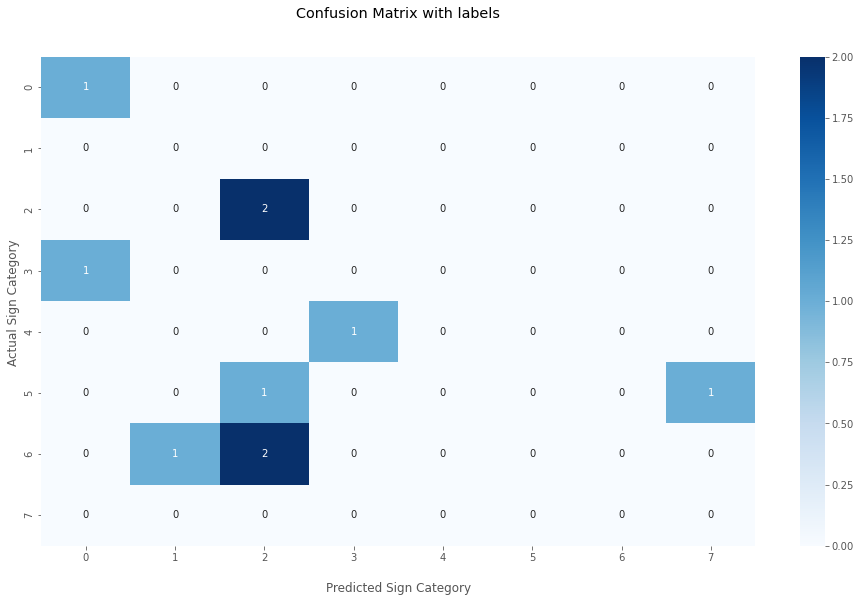

In [124]:
n_neighbors_PC10_10_10inst_alldataset = 5
 
knn_PC10_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC10_10_10inst_alldataset)
knn_PC10_10_10inst_alldataset.fit(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_train_PC10_10_10inst_alldataset, y_train_PC10_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC10_10_10inst_alldataset.score(X_test_PC10_10_10inst_alldataset, y_test_PC10_10_10inst_alldataset)))

pred_PC10_10_10inst_alldataset = knn_PC10_10_10inst_alldataset.predict(X_test_PC10_10_10inst_alldataset)
cf_matrix_PC10_10_10inst_alldataset = confusion_matrix(y_test_PC10_10_10inst_alldataset, pred_PC10_10_10inst_alldataset)


import seaborn as sns
import matplotlib.pyplot as plt

ax_PC10_10_10inst_alldataset = sns.heatmap(cf_matrix_PC10_10_10inst_alldataset, annot=True, cmap='Blues')

ax_PC10_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC10_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC10_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [125]:
##############################
  #HOW TO CALCULATE WITH PCA ( 6 components )
#############################

projection_alldataset = pca_alldataset.transform(X=new_alldataset_dataset_10_10inst)
projection_alldataset = pd.DataFrame(
    projection_alldataset,
    columns =[ 'PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20','PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30','PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38'
],
    index   = new_alldataset_dataset_10_10inst.index
)
projection_alldataset.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38
0,17.529221,-9.864477,-6.884078,0.999381,-5.104867,-11.008242,3.969023,1.636268,-2.480500,-5.363970,...,-3.082140,1.339120,-0.370908,0.111421,-1.542304,-0.005584,-0.408887,3.655334,2.090745,0.262126
1,15.123329,-11.834613,-8.654339,2.202311,-5.998027,-11.347111,7.116702,-2.184100,-0.648869,-2.614577,...,-3.356048,1.318758,-1.268593,0.141528,-2.311697,-0.651788,-0.837568,2.903410,1.996800,0.334477
2,16.790802,-5.614461,-7.503312,0.863092,-4.983020,-6.727566,3.615663,-0.750882,0.018734,-5.471905,...,-3.348173,0.969695,-0.623574,0.932120,-2.435081,0.082932,-0.156312,3.339592,1.526862,0.403232
3,12.922393,-4.729330,-9.444706,3.768033,-3.983838,-8.576965,3.539862,-0.287855,0.160952,-3.777574,...,-3.355789,1.690790,-0.464710,0.687744,-2.059922,0.780818,-1.166334,3.885354,1.926880,0.343371
4,12.920476,-7.816932,-9.961831,3.819026,-3.787219,-8.622158,6.824744,-0.496637,-1.733397,-3.124404,...,-3.444435,1.555690,-0.710737,0.628606,-2.467695,0.281058,-1.105542,2.996725,2.154132,0.303217


In [126]:
PC6_10_10inst_alldataset = projection_alldataset.iloc[:,0:6]
PC6_10_10inst_alldataset.head()

PC6_10_10inst_alldataset.insert(0,"instance",['aprender_18', 'aprender_27', 'aprender_35', 'aprender_7', 'bien_174',
 'bien_269', 'comer_146', 'comer_164', 'comer_484', 'comer_489', 'comer_743',
 'comer_779', 'comer_86', 'cómo_12', 'cómo_387', 'cómo_90', 'decir_101',
 'decir_276', 'decir_528', 'decir_789', 'dentro_369', 'dentro_457',
 'dentro_692', 'dentro_73', 'ese_100', 'ese_385', 'ese_608', 'ese_638',
 'ese_642', 'ese_697', 'fuerte_153', 'pensar_339', 'pensar_66', 'pensar_761',
 'pensar_771', 'tú_277', 'tú_639', 'tú_778'],True)

In [127]:
PC6_10_10inst_alldataset['classes'] = PC6_10_10inst_alldataset['instance'].apply(lambda x: x.split('_')[0])

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_18100\3551985106.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC6_10_10inst_alldataset['classes'] = PC6_10_10inst_alldataset['instance'].apply(lambda x: x.split('_')[0])


In [128]:
PC6_10_10inst_alldataset.drop("instance", axis=1, inplace=True)

PC6_10_10inst_alldataset.head()

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_18100\1954860938.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PC6_10_10inst_alldataset.drop("instance", axis=1, inplace=True)


,PC1,PC2,PC3,PC4,PC5,PC6,classes
0,17.529221,-9.864477,-6.884078,0.999381,-5.104867,-11.008242,aprender
1,15.123329,-11.834613,-8.654339,2.202311,-5.998027,-11.347111,aprender
2,16.790802,-5.614461,-7.503312,0.863092,-4.983020,-6.727566,aprender
3,12.922393,-4.729330,-9.444706,3.768033,-3.983838,-8.576965,aprender
4,12.920476,-7.816932,-9.961831,3.819026,-3.787219,-8.622158,bien


In [129]:
print(pd.unique(PC6_10_10inst_alldataset['classes']))

X_PC6_10_10inst_alldataset= PC6_10_10inst_alldataset.iloc[:,:-1].values
y_PC6_10_10inst_alldataset=  PC6_10_10inst_alldataset.iloc[:,-1].values

['aprender' 'bien' 'comer' 'cómo' 'decir' 'dentro' 'ese' 'fuerte' 'pensar'
 'tú']


In [130]:
Labelencoder_Y = LabelEncoder()
y_PC6_10_10inst_alldataset== Labelencoder_Y.fit_transform(y_PC6_10_10inst_alldataset)
y_PC6_10_10inst_alldataset

array(['aprender', 'aprender', 'aprender', 'aprender', 'bien', 'bien',
       'comer', 'comer', 'comer', 'comer', 'comer', 'comer', 'comer',
       'cómo', 'cómo', 'cómo', 'decir', 'decir', 'decir', 'decir',
       'dentro', 'dentro', 'dentro', 'dentro', 'ese', 'ese', 'ese', 'ese',
       'ese', 'ese', 'fuerte', 'pensar', 'pensar', 'pensar', 'pensar',
       'tú', 'tú', 'tú'], dtype=object)

In [131]:
X_train_PC6_10_10inst_alldataset, X_test_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset = train_test_split(X_PC6_10_10inst_alldataset, y_PC6_10_10inst_alldataset, test_size = 0.25, random_state=0)
scaler = MinMaxScaler()
X_train_PC6_10_10inst_alldataset = scaler.fit_transform(X_train_PC6_10_10inst_alldataset)
X_test_PC6_10_10inst_alldataset = scaler.transform(X_test_PC6_10_10inst_alldataset)

In [ ]:
#mak sure about number of features

([<matplotlib.axis.XTick at 0x1d9404e45e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

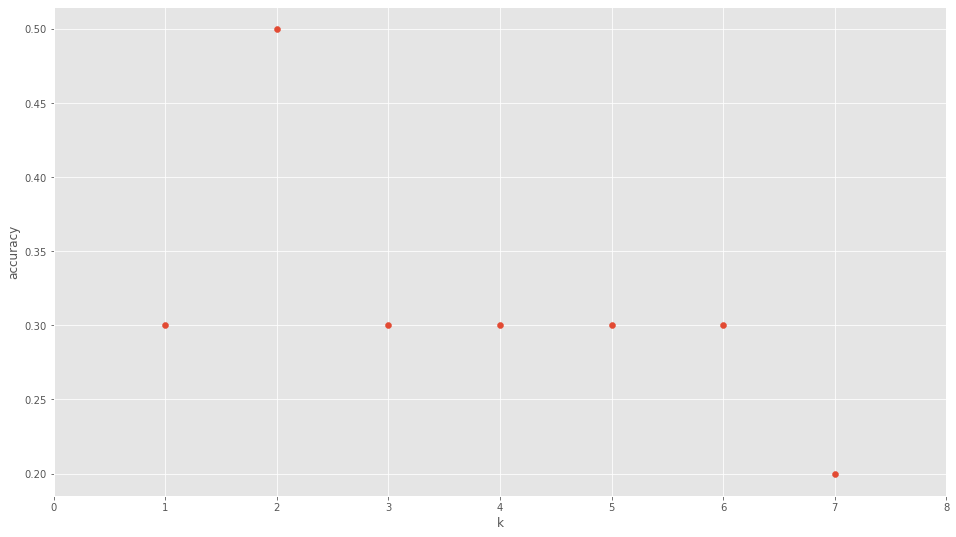

In [132]:
k_range_PC6_10_10inst_alldataset = range(1, 8)
scores_PC6_10_10inst_alldataset = []
for k in k_range_PC6_10_10inst_alldataset:
    knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors = k)
    knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
    scores_PC6_10_10inst_alldataset.append(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range_PC6_10_10inst_alldataset, scores_PC6_10_10inst_alldataset)
plt.xticks([0,1,2,3,4,5,6,7,8])

# With k = 1

Accuracy of K-NN classifier on training set: 1.00
Accuracy of K-NN classifier on test set: 0.30


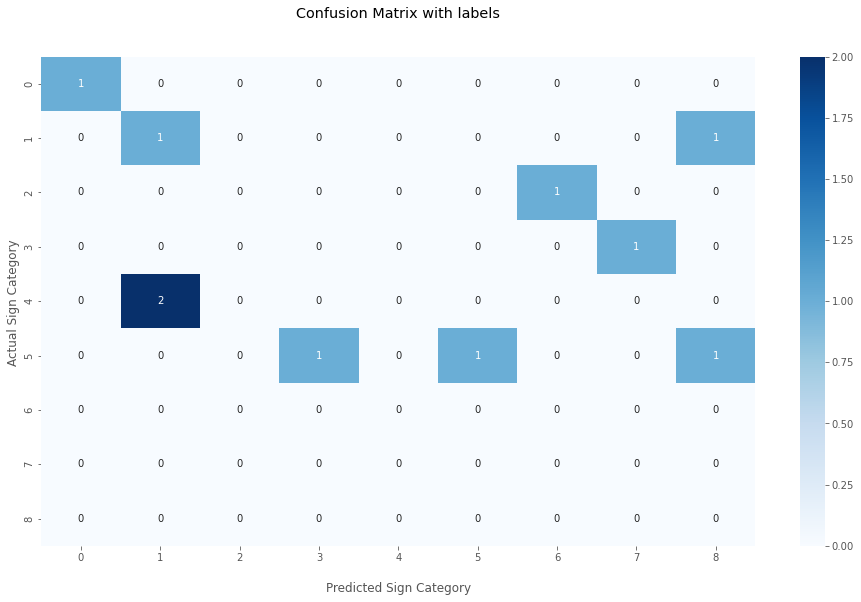

In [133]:
n_neighbors_PC6_10_10inst_alldataset = 1
 
knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_10_10inst_alldataset)
knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset)))
	 
pred_PC6_10_10inst_alldataset = knn_PC6_10_10inst_alldataset.predict(X_test_PC6_10_10inst_alldataset)
cf_matrix_PC6_10_10inst_alldataset = confusion_matrix(y_test_PC6_10_10inst_alldataset, pred_PC6_10_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_alldataset = sns.heatmap(cf_matrix_PC6_10_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 2

Accuracy of K-NN classifier on training set: 0.50
Accuracy of K-NN classifier on test set: 0.50


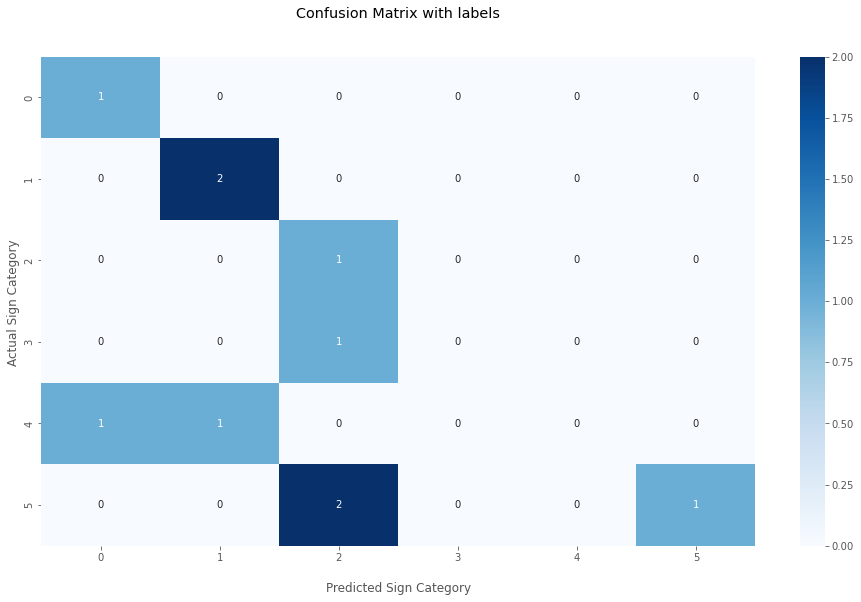

In [134]:
n_neighbors_PC6_10_10inst_alldataset = 2
 
knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_10_10inst_alldataset)
knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset)))
	 
pred_PC6_10_10inst_alldataset = knn_PC6_10_10inst_alldataset.predict(X_test_PC6_10_10inst_alldataset)
cf_matrix_PC6_10_10inst_alldataset = confusion_matrix(y_test_PC6_10_10inst_alldataset, pred_PC6_10_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_alldataset = sns.heatmap(cf_matrix_PC6_10_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 3

Accuracy of K-NN classifier on training set: 0.39
Accuracy of K-NN classifier on test set: 0.30


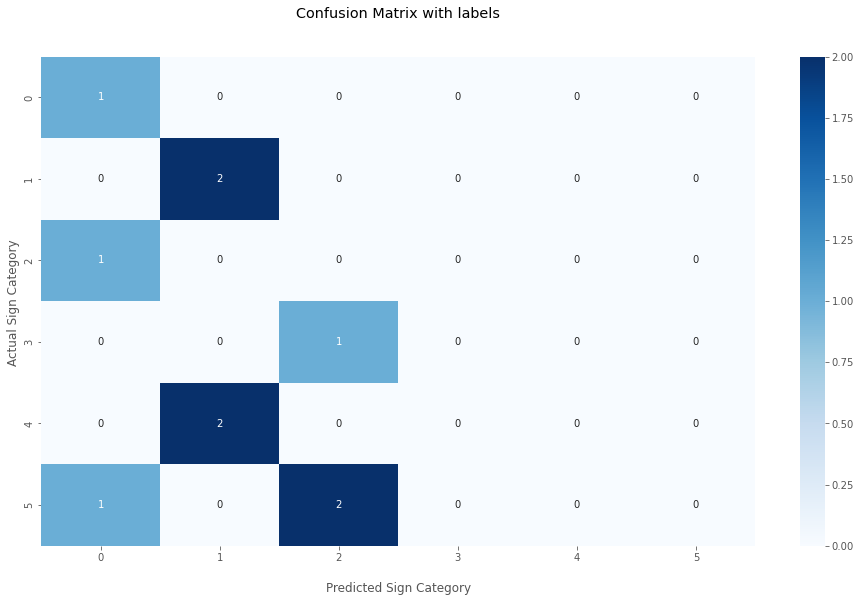

In [135]:
n_neighbors_PC6_10_10inst_alldataset = 3
 
knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_10_10inst_alldataset)
knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset)))
	 
pred_PC6_10_10inst_alldataset = knn_PC6_10_10inst_alldataset.predict(X_test_PC6_10_10inst_alldataset)
cf_matrix_PC6_10_10inst_alldataset = confusion_matrix(y_test_PC6_10_10inst_alldataset, pred_PC6_10_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_alldataset = sns.heatmap(cf_matrix_PC6_10_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

# With k = 5

Accuracy of K-NN classifier on training set: 0.36
Accuracy of K-NN classifier on test set: 0.30


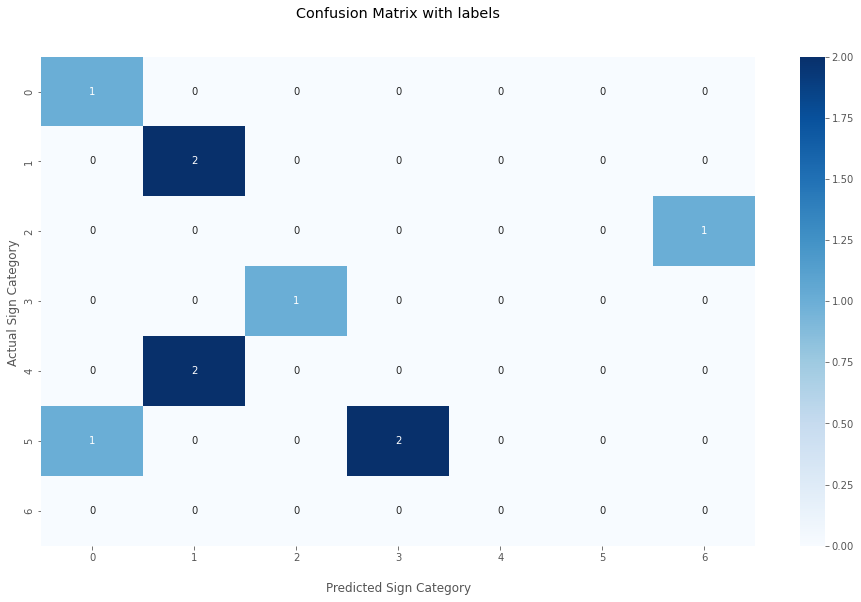

In [136]:
n_neighbors_PC6_10_10inst_alldataset = 5
 
knn_PC6_10_10inst_alldataset = KNeighborsClassifier(n_neighbors_PC6_10_10inst_alldataset)
knn_PC6_10_10inst_alldataset.fit(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_train_PC6_10_10inst_alldataset, y_train_PC6_10_10inst_alldataset)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn_PC6_10_10inst_alldataset.score(X_test_PC6_10_10inst_alldataset, y_test_PC6_10_10inst_alldataset)))
	 
pred_PC6_10_10inst_alldataset = knn_PC6_10_10inst_alldataset.predict(X_test_PC6_10_10inst_alldataset)
cf_matrix_PC6_10_10inst_alldataset = confusion_matrix(y_test_PC6_10_10inst_alldataset, pred_PC6_10_10inst_alldataset)

import seaborn as sns
import matplotlib.pyplot as plt

ax_PC6_10_10inst_alldataset = sns.heatmap(cf_matrix_PC6_10_10inst_alldataset, annot=True, cmap='Blues')
ax_PC6_10_10inst_alldataset.set_title('Confusion Matrix with labels\n\n');
ax_PC6_10_10inst_alldataset.set_xlabel('\nPredicted Sign Category');
ax_PC6_10_10inst_alldataset.set_ylabel('Actual Sign Category ');

## Display the visualization of the Confusion Matrix.
plt.show()

In [137]:
PCA_6components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset)

dic = {}
for i in range(60):
    x = list(PCA_6components_alldataset.iloc[i,:])
    if x[0] not in dic:
        dic[x[0]] = 1
    else:
        dic[x[0]] +=1
		
dic

C:\Users\BRENDA\AppData\Local\Temp\ipykernel_18100\2214246785.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_6components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset)
C:\Users\BRENDA\AppData\Local\Temp\ipykernel_18100\2214246785.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_6components_alldataset = PC1_df_alldataset.append(PC2_df_alldataset).append(PC3_df_alldataset).append(PC4_df_alldataset).append(PC5_df_alldataset).append(PC6_df_alldataset)
C:\Users\BRENDA\AppData\Local\Temp\ipykernel_18100\2214246785.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_6components_alldataset = PC1_df_a

{'feature_1087': 1,
 'feature_1086': 1,
 'feature_1085': 1,
 'feature_1084': 1,
 'feature_1083': 1,
 'feature_1088': 1,
 'feature_996': 1,
 'feature_994': 1,
 'feature_992': 1,
 'feature_1071': 1,
 'feature_1208': 1,
 'feature_1133': 1,
 'feature_1283': 1,
 'feature_1358': 1,
 'feature_1433': 1,
 'feature_1058': 1,
 'feature_1210': 1,
 'feature_1135': 1,
 'feature_1285': 1,
 'feature_762': 1,
 'feature_382': 1,
 'feature_307': 1,
 'feature_532': 1,
 'feature_457': 1,
 'feature_232': 1,
 'feature_607': 1,
 'feature_157': 1,
 'feature_528': 1,
 'feature_453': 1,
 'feature_82': 1,
 'feature_58': 1,
 'feature_57': 1,
 'feature_66': 1,
 'feature_61': 1,
 'feature_62': 1,
 'feature_65': 1,
 'feature_60': 1,
 'feature_56': 1,
 'feature_402': 1,
 'feature_64': 1,
 'feature_146': 1,
 'feature_147': 1,
 'feature_142': 1,
 'feature_143': 1,
 'feature_129': 1,
 'feature_138': 1,
 'feature_148': 1,
 'feature_139': 1,
 'feature_144': 1,
 'feature_134': 1,
 'feature_212': 1,
 'feature_211': 1,
 'feat

# At least 50 % of recognized fingers

In [138]:
df = pd.read_csv("C:/PSL_KNN/data_10_frames_10_instances_with_fingers_shaping.csv")

df['classes'] = df['videoname'].apply(lambda x: x.split('_')[0])
df['number'] = df['videoname'].apply(lambda x: x.split('_')[1])

n_uniq_videos = df['videoname'].nunique()

In [139]:
df

,videoname,n_frame,n_landmark,x,y,class,number,have_landmarks?,all_frames?,n_frames,n_instances,instance_to_use?,valid_frame?,classes
0,aprender_175,0,0,0.495806,0.201817,aprender,175,True,True,17,10,True,True,aprender
1,aprender_175,0,1,0.523832,0.167673,aprender,175,True,True,17,10,True,True,aprender
2,aprender_175,0,2,0.543781,0.169565,aprender,175,True,True,17,10,True,True,aprender
3,aprender_175,0,3,0.561008,0.171631,aprender,175,True,True,17,10,True,True,aprender
4,aprender_175,0,4,0.480482,0.162782,aprender,175,True,True,17,10,True,True,aprender
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112495,tú_778,10,70,1.000000,1.000000,tú,778,True,True,11,28,True,True,tú
112496,tú_778,10,71,1.000000,1.000000,tú,778,True,True,11,28,True,True,tú
112497,tú_778,10,72,1.000000,1.000000,tú,778,True,True,11,28,True,True,tú
112498,tú_778,10,73,1.000000,1.000000,tú,778,True,True,11,28,True,True,tú


In [140]:
#df = pd.DataFrame(df, columns=['videoname', 'n_frame', 'n_landmark'])

In [141]:
#new_dataframe = df.groupby(['videoname'])

In [142]:
#new_dataframe

In [143]:
#new_dataframe.to_frame()

In [144]:
#Number of unique videos
n_uniq_videos 

150

In [145]:
#Counting the numbers of frames withouth fingers landmarks per video

#COMMENT THE LOGIC 

#Wer'e elimitaing those that don't have at leat 1 point

frames_without_fingers_video = df.groupby(['videoname']).apply(lambda x: x[x['x'] == 1]['n_frame'].count())
frames_without_fingers_video

# we want to try different things there

videoname
aprender_175     42
aprender_18     126
aprender_195     63
aprender_217     42
aprender_27     147
               ... 
yo_164            0
yo_193           21
yo_235            0
yo_237            0
yo_3             84
Length: 150, dtype: int64

In [146]:
df_videos = df.loc[(df.x==1)&(df.y==1),:].groupby(['videoname']).n_frame.nunique().reset_index()
#Validate just 10 frames per video
new_df = df.groupby(['videoname']).n_frame.nunique().reset_index()
new_df 

,videoname,n_frame
0,aprender_175,10
1,aprender_18,10
2,aprender_195,10
3,aprender_217,10
4,aprender_27,10
...,...,...
145,yo_164,10
146,yo_193,10
147,yo_235,10
148,yo_237,10


In [147]:
df_videos.rename(columns = {'n_frame' : 'n_frame_no_recuperados'}, inplace = True)
new_df.rename(columns = {'n_frame' : 'n_frame_total'}, inplace = True)

df_merge = new_df.merge(df_videos, how = 'left', on = 'videoname')

df_merge

,videoname,n_frame_total,n_frame_no_recuperados
0,aprender_175,10,2.0
1,aprender_18,10,6.0
2,aprender_195,10,3.0
3,aprender_217,10,2.0
4,aprender_27,10,6.0
...,...,...,...
145,yo_164,10,NaN
146,yo_193,10,1.0
147,yo_235,10,NaN
148,yo_237,10,NaN


In [148]:
#Number of videos with and without fingers
df_merge['videoname'].count()


150

In [149]:
#Number of videos without fingers
df_merge['n_frame_no_recuperados'].count()

123

In [150]:
# TOTAL (SUM) OF NOT RECOVERED FRAMES PER VIDEO
df_merge['n_frame_no_recuperados'].sum()

472.0

In [151]:
df_merge["porcentaje_no_recuperados"] = df_merge['n_frame_no_recuperados'] / df_merge['n_frame_total']

#Average of frames without fingers among all the videos
# TOTAL OF NOT RECOVERED FRAMES PER VIDEO : 472
# Number of videos without fingers: 123

#average of percentage on each video -> 150 videos

#123 / 472 = 26%

mean_frames_without_fingers = df_merge['n_frame_no_recuperados'].count() / df_merge['n_frame_no_recuperados'].sum()
mean_frames_without_fingers

0.2605932203389831

In [152]:
df_merge

,videoname,n_frame_total,n_frame_no_recuperados,porcentaje_no_recuperados
0,aprender_175,10,2.0,0.2
1,aprender_18,10,6.0,0.6
2,aprender_195,10,3.0,0.3
3,aprender_217,10,2.0,0.2
4,aprender_27,10,6.0,0.6
...,...,...,...,...
145,yo_164,10,NaN,NaN
146,yo_193,10,1.0,0.1
147,yo_235,10,NaN,NaN
148,yo_237,10,NaN,NaN


In [153]:
temp_1 = df_merge['porcentaje_no_recuperados'] >= 0.5

temp_2 = temp_1.to_frame()
temp_2.loc[:,["porcentaje_no_recuperados"]]


,porcentaje_no_recuperados
0,False
1,True
2,False
3,False
4,True
...,...
145,False
146,False
147,False
148,False


In [154]:
temp_2.rename(columns = {'porcentaje_no_recuperados':'boolean_porcentaje_no_recuperados'}, inplace = True)

In [155]:
temp_2

,boolean_porcentaje_no_recuperados
0,False
1,True
2,False
3,False
4,True
...,...
145,False
146,False
147,False
148,False


In [156]:
#count trues
temp_2.porcentaje_no_recuperados.value_counts()

AttributeError: 'DataFrame' object has no attribute 'porcentaje_no_recuperados'

In [ ]:
temp_2

,porcentaje_no_recuperados
0,False
1,True
2,False
3,False
4,True
...,...
145,False
146,False
147,False
148,False


In [ ]:
df_merge.insert(loc=1, column="boolean_porcentaje_no_recuperados", value=temp_2)


In [ ]:
df_merge.head()

,videoname,boolean_porcentaje_no_recuperados,n_frame_total,n_frame_no_recuperados,porcentaje_no_recuperados
0,aprender_175,False,10,2.0,0.2
1,aprender_18,True,10,6.0,0.6
2,aprender_195,False,10,3.0,0.3
3,aprender_217,False,10,2.0,0.2
4,aprender_27,True,10,6.0,0.6


In [ ]:
df_false = df_merge.loc[(df_merge.boolean_porcentaje_no_recuperados==False)]

In [ ]:
df_videoname = df_false['videoname']

In [ ]:
type(df_merge)

pandas.core.frame.DataFrame

In [ ]:
type(temp_2)

pandas.core.frame.DataFrame

In [ ]:
#df.append(temp_2, ignore_index=True)

In [ ]:
#df.drop(df[df.porcentaje_ < 50].index, inplace=True)

In [ ]:
count_trues = temp_2['porcentaje_no_recuperados'].sum()

In [ ]:
'''
Metrics without fingers% 
1. 25.3% of videos have more than 50% of their frames without the finger joints.
2. 74.7% of videos have more than 50% of their frames with the finger joints.
'''

metrics_without_fingers = count_trues / df_merge['videoname'].count()
metrics_without_fingers

0.25333333333333335

In [ ]:
#GET RID OF THOSE ONES

In [ ]:
#videoname_to_drop = df_videoname.to_list()